# Stackify
## You learn from my problems, one click at a time

Stackoverflow is a wonderful blogging platform, where users can post questions about specific technical fields, from science to computer science to social science, while other users can then comment and answers those questions.

Most users, though, use the platform for a very specific use: to ask a precise answer or look for a specific answer. But sometimes the best learning experience comes from unexpected places. Take the example of Wikipedia, where a user can jump from one article to the next using the hyperlinks provided.

Stackify is a product that emulates that experience by providing semantically related articles to keywords automatically identified. In that way, a user will be able to read a question, and be provided with links to concepts to follow-up on.

This will be good for the user, for it will allow to explore the various ways that a topic appears in questions, and gain knowledge by seeing how people use that concept. This will also be good for the business, since this product incentivizes users to spend more time on the platform, thus increasing customer activity.

### The results

Before going into the algorithm, let's see what the code can do for you

In [1]:
from Stackify_pipeline import main_function, user_input

Let's say that we are reading a physics article about python,

In [16]:
link = 'https://stackoverflow.com/questions/276761/exposing-a-c-api-to-python'

The function "user_input" gives us a summary of what we are currently reading,

In [13]:
index, question_id, title, body, field = user_input(link)
print('Summary of the question\n')
print(' - question id: {}\n'.format(question_id))
print(' - question title:\n{}\n'.format(title))
print(' - question body:\n {}\n'.format(body))
print(' - question topic: {}'.format(field))

Summary of the question

 - question id: 276761

 - question title:
Exposing a C++ API to Python

 - question body:
 I'm currently working on a project were I had to wrap the C++ classes with Python to be able to script the program. So my specific experience also involved embedding the Python interpreter in our program.
The alternatives I tried were:

Boost.Python
I liked the cleaner API produced by Boost.Python, but the fact that it would have required that users install an additional dependency made us switch to SWIG.
SWIG
SWIG's main advantage for us was that it doesn't require end users to install it to use the final program.

What have you used to do this, and what has been your experience with it?


 - question topic: python


From there, the function 'main_function' automatically identifies the relevant keywords and suggests the three most relevant articles for each of the keywords.

In [14]:
main_function(link)

python:

 - https://stackoverflow.com/questions/178199/python-can-i-have-a-list-with-named-indices
 - https://stackoverflow.com/questions/1211806/python-high-precision-time-sleep
 - https://stackoverflow.com/questions/2589711/find-full-path-of-the-python-interpreter


program:

 - https://stackoverflow.com/questions/44851668/how-can-i-find-out-which-module-a-name-is-imported-from
 - https://stackoverflow.com/questions/5630441/how-do-rpy2-pyrserve-and-pyper-compare
 - https://stackoverflow.com/questions/304883/what-do-i-use-on-linux-to-make-a-python-program-executable


api:

 - https://stackoverflow.com/questions/342729/how-should-i-learn-to-use-the-windows-api-with-python
 - https://stackoverflow.com/questions/5297448/how-to-get-md5-sum-of-a-string-using-python
 - https://stackoverflow.com/questions/1025029/how-to-use-win32-apis-with-python


use:

 - https://stackoverflow.com/questions/3580027/how-do-you-determine-which-backend-is-being-used-by-matplotlib
 - https://stackoverflow.com

Here is another example with a physics article,

In [3]:
link_physics = 'https://physics.stackexchange.com/questions/251867/what-manifold-is-spacetime'

In [19]:
index, question_id, title, body, field = user_input(link_physics)
print('Summary of the question\n')
print(' - question id: {}\n'.format(question_id))
print(' - question title:\n{}\n'.format(title))
print(' - question body:\n {}\n'.format(body))
print(' - question topic: {}'.format(field))

(7262,
 251867,
 'What manifold is spacetime?',
 'In General Relativity, spacetime is a $4$-dimensional manifold with one Lorentzian metric tensor defined on it. In the Special Relativity case what manifold is spacetime is quite clear: it is essentially $\\mathbb{R}^4$ endowed with the metric tensor $\\eta_{\\mu\\nu}=\\operatorname{diag}(-1,1,1,1)$.\nOn the other hand, on General Relativity I can\'t understand exactly what manifold spacetime is. I\'ll try to make my point clearer. Some people say: "you can\'t know this beforehand, the Einstein Field Equations are the source of this information". Now, the Einstein equations are equations for the metric tensor, not for the manifold (this wouldn\'t even make sense).\nBut the metric tensor is a tensor field. It is a function defined on spacetime. It only makes sense talking about it, if we know beforehand its domain!\nThe equation itself is one differential equation for functions defined on $M$, how can we work with those function, if the 

In [4]:
main_function(link_physics)

manifold:

 - https://physics.stackexchange.com/questions/92741/what-is-the-geometrical-interpretation-of-ricci-tensor
 - https://physics.stackexchange.com/questions/123725/what-kind-of-manifold-can-be-the-phase-space-of-a-hamiltonian-system
 - https://physics.stackexchange.com/questions/93627/are-conformal-killing-and-homothetic-vector-fields-the-same-in-pseudo-riemannia


define:

 - https://physics.stackexchange.com/questions/128026/how-to-understand-the-definition-of-vector-and-tensor
 - https://physics.stackexchange.com/questions/123097/units-of-a-discrete-fourier-transform
 - https://physics.stackexchange.com/questions/158890/is-there-a-physical-interpretation-of-a-tensor-as-a-vector-with-additional-quali


equation:

 - https://physics.stackexchange.com/questions/41138/what-is-the-physical-meaning-of-the-action-in-lagrangian-mechanics
 - https://physics.stackexchange.com/questions/71611/maxwells-equation-from-electromagnetic-lagrangian
 - https://physics.stackexchange.com/questi

## The algorithm

The complete pipeline is composed of various parts. Here are the steps that will be taken for data collection and processing,
 - We first build a database of data from Stackoverflow, which we collect using the web API. The data includes over 40,000 entries each containing the title post, the question, the question id, and the link to the question. 
 - The data processing step consists in removing stop words, stemming and lemmatizing the raw text data.
 - We need to extract additional features which will include the article keywords as well as semantic distances. For this step, we employ TextRank and Word2Vec.

Once we have built our data base of Stackoverflow articles, we can actually execute our program. Here are the steps that the programs takes with a user input,

 - The user will provide the URL of the Stackoverflow post being read.
 - Based on the URL, the algorithm will read the text, identify the semantically relevant keywords, and based on the database, will calculate which other article is most closely related to each keyword.
 - The output will be a list of the keywords along with the link to the post most relevant.
 - The user can then select a keyword to follow-up on by inputting the link into the algorithm once again.

## The data

In [10]:
import pandas as pd
import pickle

The data contains 40,000 entries and was collected through the StackExchange web API. The API has a limit of 10,000 requests per day and up to 100 points per requests. Not using the API would limit the scraping rate to 300 requests per day.

For our collection, we included
- the title of the post,
- the actual question,
- the link to the post,
- the question ID,
- the question tags
- the question field (physics, biology or python).
- the question link

In [3]:
raw_data = pickle.load(open('iterative_scraping_Stackoverflow.pkl', "rb" ))

In [6]:
raw_data[:5]

,id,tags,title,body,link,type,field
0,77587,[botany],Examples of plant families that contain specie...,<p>The most classic example if you want to win...,https://biology.stackexchange.com/questions/77...,answers,biology
1,77587,[botany],Examples of plant families that contain specie...,"<p>The <a href=""https://en.wikipedia.org/wiki/...",https://biology.stackexchange.com/questions/77...,answers,biology
2,77587,[botany],Examples of plant families that contain specie...,"<p>Both the <a href=""https://en.wikipedia.org/...",https://biology.stackexchange.com/questions/77...,answers,biology
3,77371,"[evolution, sex]",Are there lifeforms that have more than 2 sexes?,<p>There exists something like multiple sexes ...,https://biology.stackexchange.com/questions/77...,answers,biology
4,77516,"[nomenclature, research-process]",How a Name is Selected for Binomial Nomenclature,<p>Your question covers a whole field of resea...,https://biology.stackexchange.com/questions/77...,answers,biology


Data processing includes various steps:
- removing the html codes and stop words from each question
- tokenizing and lemmatizing the words
- blending together the title and body of the question (colloquially called mushing)
- For each question, extracting the keywords, their TextRank scores, and their word vectors based on word2vec
- For each question, calculate the question vector defined as the average from all of the keyword vectors

In [7]:
data = pickle.load(open('iterative_scraping_Stackoverflow_processed.pkl', "rb" ))

In [8]:
data[:5]

,id,tags,title,body,link,type,field,mushed,keywords w2v,average w2v
0,32573991,"[python, jdbc, apache-spark, apache-spark-sql,...",spark predicate pushdown work jdbc,accord catalyst apply logical optimization pre...,https://stackoverflow.com/questions/32573991/d...,questions,python,spark predicate pushdown work jdbcaccord catal...,"[[catalog, [0.18164062, 0.17480469, -0.0439453...","[-0.01678031, -0.005684989, -0.00018746514, 0...."
1,71214,"[organic-chemistry, carbohydrates]",glycosidic bond,glycosidic bond maltose glycosidic bond form h...,https://biology.stackexchange.com/questions/71...,questions,biology,glycosidic bondglycosidic bond maltose glycosi...,"[[bond, [0.19238281, -0.096191406, 0.18164062,...","[0.19238281, -0.096191406, 0.18164062, -0.1523..."
2,71595,[species-identification],type bee wasp,found bee wasp garden auckland new zealand lon...,https://biology.stackexchange.com/questions/71...,questions,biology,type bee waspfound bee wasp garden auckland ne...,"[[bee, [-0.22949219, 0.03564453, -0.41601562, ...","[0.017595079, 0.06667074, -0.109422475, 0.0145..."
3,10417108,"[python, opencv]",different opencv python interface,opencv library opencv guy old library opencv g...,https://stackoverflow.com/questions/10417108/w...,questions,python,different opencv python interfaceopencv librar...,"[[guy, [0.30273438, 0.04296875, -0.033935547, ...","[0.30273438, 0.04296875, -0.033935547, 0.32421..."
4,2765892,"[python, set]",python see one set contain another entirely,fast way check one set entirely contain anothe...,https://stackoverflow.com/questions/2765892/py...,questions,python,python see one set contain another entirelyfas...,"[[way, [0.15332031, 0.071777344, -0.024169922,...","[0.15332031, 0.071777344, -0.024169922, 0.1318..."


## NLP on keywords: TextRank and Word2vec

### TextRank

In [11]:
from gensim.summarization import keywords

There exist several methods to obtain the keywords of a text. We have decided to rely on the TextRank algorithm to obtain the keywords. The TextRank algorithm [1] builds a graph out of the words in a text where each connection in the graph represents a relationship between words in the text. It is therefore possible to make a ranking on the importance of a word based on the number of connections each word has. Those words that have most connections are the keywords.


[1] Rada Mihalcea and Paul Tarau, **TextRank: Bringing Order into Texts**, Department of Computer Science University of North Texas

In our case, the TextRank algorithm came up with the following words,

In [20]:
from Stackify_pipeline import user_input

In [21]:
index, question_id, title, body, field = user_input(link)
print(body)

I'm currently working on a project were I had to wrap the C++ classes with Python to be able to script the program. So my specific experience also involved embedding the Python interpreter in our program.
The alternatives I tried were:

Boost.Python
I liked the cleaner API produced by Boost.Python, but the fact that it would have required that users install an additional dependency made us switch to SWIG.
SWIG
SWIG's main advantage for us was that it doesn't require end users to install it to use the final program.

What have you used to do this, and what has been your experience with it?



In [32]:
keyword_list = keywords(body, ratio=0.2,
                        words=None,
                        split=False,
                        scores=True,
                        pos_filter=None,
                        lemmatize=True,
                        deacc=True)
for keyword, score in keyword_list:
    print('{}: {}'.format(keyword, score))

api: 0.3044964501685478
python: 0.3044964501685475
users: 0.2708480333666006
end: 0.27084803336659996


What we see above is the list of keywords extracted from the body of the question, along side their TextRank score. 

The score is a measure of the connectivity of each of the keywords to all other words in the text, based on the graph of the text.

Let's backup a little bit and explain how TextRank works. TextRank is an algorithm that creates a graph out of the text. To do so, here is the receipe that it follows:
- each word is assigned a node
- an edge is built between two nodes if two words co-occur with a given window from each other

In [36]:
from text_graph import get_graph
import networkx as nx
import matplotlib.pyplot as plt

In [37]:
def graphing_text(text):
    G = get_graph(text)
    nodes = G.nodes()
    edges = G.edges()
    g = nx.Graph()	# Using networkx to define the graph will help us use the handy network plotting utilities
    for node in nodes:
        g.add_node(node)
    for edge in edges:
        g.add_edge(edge[0], edge[1])
    pos=nx.spring_layout(g)
    pos_adjust = {}
    for key in pos:
    #		radius = np.linalg.norm(pos[key])
        pos_adjust[key] = pos[key]*1.1
    nx.draw_networkx_edges(g,pos, width=0.5)
    nx.draw_networkx_nodes(g,pos,node_size=50)
    nx.draw_networkx_labels(g,pos_adjust,font_size=15,font_family='sans-serif')
    plt.axis('off')
    #	plt.savefig('text_graph.png')
    plt.tight_layout()
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.show()

/home/matthias/anaconda3/envs/insight/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


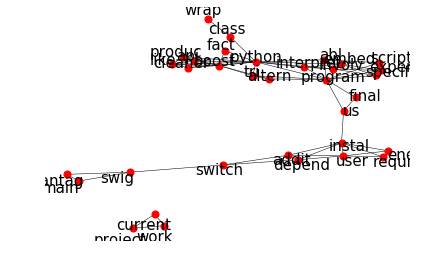

In [50]:
graphing_text(body)

What we see above is a graph that is built out of the text following the receipe described above. Now, to each of the node $i$ is assigned a score, $S(i)$. This score is calculated via an iterative process based on the formula,

$$S(i)=1-d+d\sum_{j\in\text{In(i)}}\frac{1}{\text{Out(j)}}S(j)$$

where,
- $S(i)$ is the score at node $i$
- $\text{In}(i)$ is the set of edges incoming into node $i$
- $\text{Out}(i)$ is the set of edges outgoing from node $i$
- $d = 0.85$ is an arbitrary meta-parameter

In [54]:
from IPython.display import Image

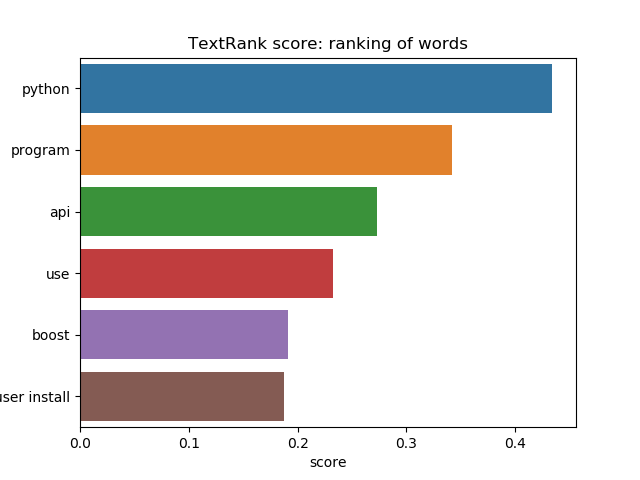

In [61]:
Image(filename = 'top_keywords.png')

### Word2Vec

Those words, however, are only the relevant keywords, but are not necessarily the semantically relevant keywords. In order for that, it is necessary to invole a word embedding model which is able to understand meaning of words.

It is quite costly and difficult to train a native word embedding model however, thus we are using a pre-trained model by Google, based on the 20-billion news articles data set.

The word embedding creates an abstract 300-dimensional vector space in which each word is associated a vector.  

Since we are using a pre-trained model, all we have to do is invoke it through the Gensim package.

path = './GoogleNews-vectors-negative300.bin.gz'

model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True, limit = 1000000)

pickle.dump(model, open('word2vec_model.pkl', "wb" ) )

Once loaded, we are pickling the model for future use.

In [5]:
model = pickle.load(open("word2vec_model.pkl", "rb" ))

For example, the vector for 'cat', is

In [17]:
model['cat']

array([ 0.0123291 ,  0.20410156, -0.28515625,  0.21679688,  0.11816406,
        0.08300781,  0.04980469, -0.00952148,  0.22070312, -0.12597656,
        0.08056641, -0.5859375 , -0.00445557, -0.296875  , -0.01312256,
       -0.08349609,  0.05053711,  0.15136719, -0.44921875, -0.0135498 ,
        0.21484375, -0.14746094,  0.22460938, -0.125     , -0.09716797,
        0.24902344, -0.2890625 ,  0.36523438,  0.41210938, -0.0859375 ,
       -0.07861328, -0.19726562, -0.09082031, -0.14160156, -0.10253906,
        0.13085938, -0.00346375,  0.07226562,  0.04418945,  0.34570312,
        0.07470703, -0.11230469,  0.06738281,  0.11230469,  0.01977539,
       -0.12353516,  0.20996094, -0.07226562, -0.02783203,  0.05541992,
       -0.33398438,  0.08544922,  0.34375   ,  0.13964844,  0.04931641,
       -0.13476562,  0.16308594, -0.37304688,  0.39648438,  0.10693359,
        0.22167969,  0.21289062, -0.08984375,  0.20703125,  0.08935547,
       -0.08251953,  0.05957031,  0.10205078, -0.19238281, -0.09

We can measure the semantic similarity between two words by measuring their cosine similarities. The cosine similarity is simply defined as the cosine between two vectors,

$$\rm{cosine~similarity}=\frac{\vec{word_1}\cdot\vec{word_2}}{|\vec{word_1}||\vec{word_1}|}=\cos{\theta}$$

where $\theta$ is the angle between the two vectors.

In [23]:
cat = model['cat']
dog = model['dog']

semantic_distance(cat, dog)

0.7609457

Now, we can check the difference between the word **cat** and the word **house**

In [24]:
house = model['house']

semantic_distance(cat, house)

0.26779082

It makes total sense that the similarity between house and cat is lower than that for cat and dog, since a house is not an animal.

By calculating an average word embedding for each of the questions, like so,

$$post = \frac{\sum_{words}model[words]}{\sum_{words}}$$

Using this concept, the average semantic meaning for the text is,

In [6]:
data = pickle.load(open('iterative_scraping_Stackoverflow_processed.pkl', "rb" ))

In [10]:
index = data[data.loc[:,'id'] == question_id].index.get_values()[0]
article_average = data.loc[index,'w2v']
article_average

array([ 1.43115234,  0.92327881, -2.85414124,  3.67681122, -4.52377224,
        1.80059814,  5.18981934, -0.80782795,  1.38024902,  5.90446949,
       -1.44403076, -5.27587891, -0.65759277,  1.98156738, -6.29821777,
        2.48974609,  0.66727209,  2.47045898,  1.09542847, -4.60583496,
       -0.63599396,  5.19911957,  0.09143066,  4.57414246,  0.38748169,
       -2.29849243, -5.92993164,  4.77798462,  1.70123291, -1.18859863,
       -1.47040558,  1.76025391, -2.08925247, -4.04143906,  0.49291992,
       -2.52258301,  2.6572876 ,  0.56848145,  2.61634064,  2.60391998,
        3.47973633,  0.63443756,  7.56448364,  2.6221199 , -1.712883  ,
       -7.4276123 , -4.73992157,  1.66318512, -0.73643494,  2.17603302,
       -2.02209473, -1.66214752,  1.94830322, -6.25686646,  1.04930115,
       -0.99091339, -1.07794189, -4.47229004,  1.33776855, -4.42079163,
        0.33921814, -1.84597778, -5.81445312, -0.72073364, -0.47381592,
        0.38372803, -4.56762695,  2.91445923, -2.16357422,  2.17

Using a similar measure, we now define a similarity between the keywords and all other articles in the data base.

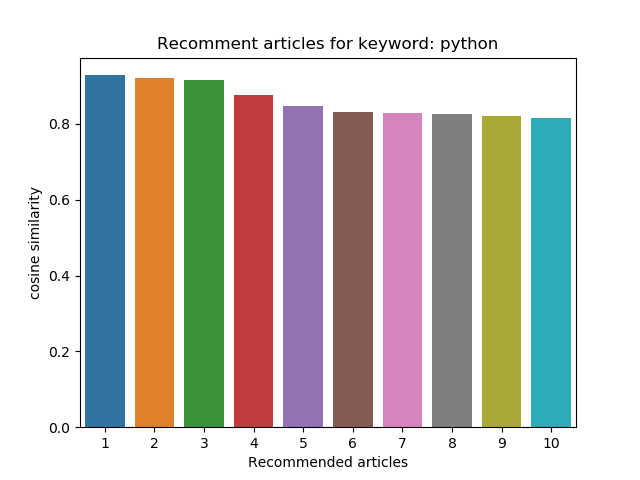

In [62]:
Image(filename = 'top_articles_fo_keyword.png')